# Titanic Dataset

## Imports

Start with importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde

## Data

Load in the data. <br>
Source: https://www.kaggle.com/c/titanic

In [2]:
df = pd.read_csv('data/train.csv')
print('Number of Rows:', len(df))
print('Columns:', list(df.columns))

Number of Rows: 891
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## Data Exploration

Get a sense of the data. Look for patterns to measure statistically.

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### General Trends

Simple relationships between survival and other variables.

In [4]:
base_survival = ((df.Survived.value_counts() * 100)/ len(df)).round(1).astype(str) + '%'
base_survival.index = ['Died', 'Survived']
base_survival

Died        61.6%
Survived    38.4%
Name: Survived, dtype: object

In [5]:
pt = df.pivot_table(index='Survived')
pt.index = pd.Series(['No', 'Yes'], name='Survived?')
pt

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived?,,,,,,
No,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
Yes,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


A few things of notice:
<ul>
    <li>Here we see that survivors tended to be younger than non-survivors.</li>
    <li>They also tended to have paid a higher fare and stayed in a higher class (indicated by a lower number) than non-survivors. </li>
    <li>In general, having a greater number of parents or children on board is correlated with a greater survival rate, but having <i>fewer</i> siblings/spouses was related to a higher rate of survival.</li>
</ul>

### Sex

Look at differences in survival rates between the sexes:

In [6]:
print('Passenger sexual demographics:')
df.Sex.value_counts()

Passenger sexual demographics:


male      577
female    314
Name: Sex, dtype: int64

In [7]:
print('Survival rates by sex:')
df.groupby('Sex').agg(np.mean)['Survived']

Survival rates by sex:


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [8]:
df.pivot_table(index='Sex',
               columns='Survived',
               aggfunc=np.mean)

Age                  Fare                Parch            \
Survived          0          1          0          1         0         1   
Sex                                                                        
female    25.046875  28.847716  23.024385  51.938573  1.037037  0.515021   
male      31.618056  27.276022  21.960993  40.821484  0.207265  0.357798   

         PassengerId                Pclass               SibSp            
Survived           0           1         0         1         0         1  
Sex                                                                       
female    434.851852  429.699571  2.851852  1.918455  1.209877  0.515021  
male      449.121795  475.724771  2.476496  2.018349  0.440171  0.385321

So far we can see that female passengers were much more likely to survive the ship's sinking than men. We can also see that female survivors tended to be older than female passengers who did not survive, but that the opposite relationship holds for men.

### Age

In [9]:
print('Min Age:', min(df.Age))
print('Max Age:', max(df.Age))

Min Age: 0.42
Max Age: 80.0


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


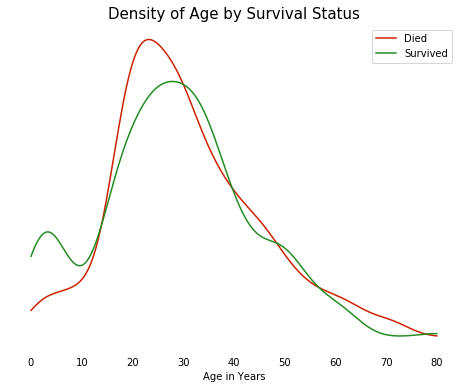

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

died = df[df.Survived == 0]['Age'].dropna()
survived = df[df.Survived == 1]['Age'].dropna()

died_density = gaussian_kde(died)
xs = np.linspace(0,80,200)
died_density.covariance_factor = lambda : .25
died_density._compute_covariance()
plt.plot(xs,died_density(xs), color='#cc2000', label='Died')

survived_density = gaussian_kde(survived)
xs = np.linspace(0,80,200)
survived_density.covariance_factor = lambda : .25
survived_density._compute_covariance()
plt.plot(xs,survived_density(xs), color='#228b22', label='Survived')


plt.yticks([])
plt.tick_params(bottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.legend()
plt.xlabel('Age in Years')
plt.title('Density of Age by Survival Status', fontsize=15)


plt.show()

Looking at the plot above, we can see that the age trends for people in both survival groups are quite similar. We can see that survivors had a somewhat wider range of ages, while those who died were more concentrated at around 20-30 years old. Also there is a large concentration of very young children (less than 5-7 years old) that survived.

### Socio-Economics

In [11]:
print('Min Fare:', min(df.Fare))
print('Max Fare:', max(df.Fare))

Min Fare: 0.0
Max Fare: 512.3292


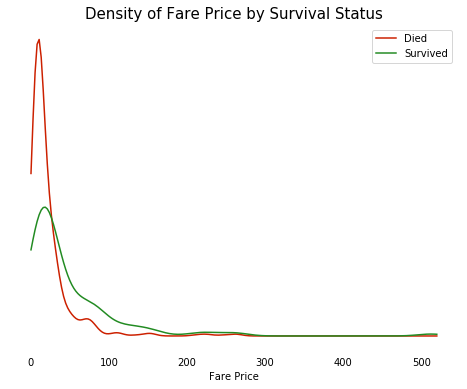

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

died = df[df.Survived == 0]['Fare'].dropna()
survived = df[df.Survived == 1]['Fare'].dropna()

died_density = gaussian_kde(died)
xs = np.linspace(0,520,200)
died_density.covariance_factor = lambda : .25
died_density._compute_covariance()
plt.plot(xs,died_density(xs), color='#cc2000', label='Died')

survived_density = gaussian_kde(survived)
xs = np.linspace(0,520,200)
survived_density.covariance_factor = lambda : .25
survived_density._compute_covariance()
plt.plot(xs,survived_density(xs), color='#228b22', label='Survived')

plt.yticks([])
plt.tick_params(bottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.legend()
plt.xlabel('Fare Price')
plt.title('Density of Fare Price by Survival Status', fontsize=15)


plt.show()

From the above plot we can see that most of the passengers who died paid quite a low fair price. While those who lived tended to have paid higher prices to board.

Now we'll explore the relationship between cabin class and survival.

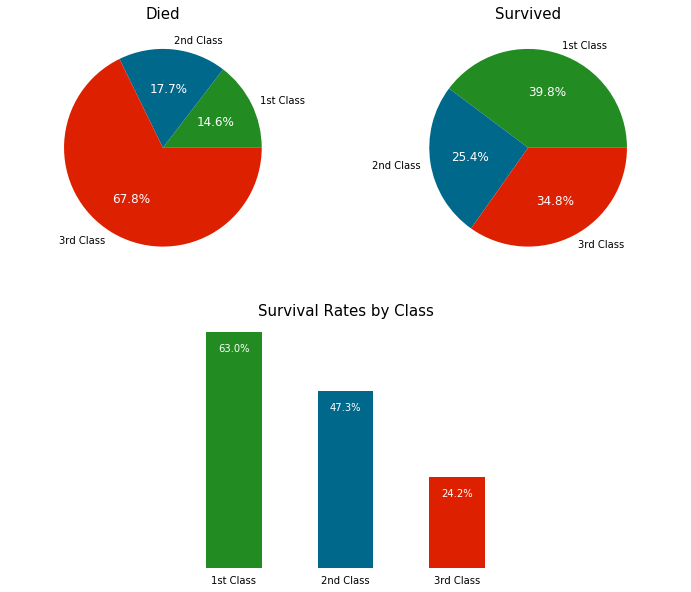

In [13]:
fig = plt.figure(figsize=(12,10))
gspec = gridspec.GridSpec(2,2)

died = df[df.Survived == 0]['Pclass'].value_counts().sort_index()
survived = df[df.Survived == 1]['Pclass'].value_counts().sort_index()

class_labels = ['1st Class', '2nd Class', '3rd Class']
class_colors = ['#228b22', '#00688b', '#dd2000']

ax = plt.subplot(gspec[0,0])
_, _, autotexts = plt.pie(died, labels=class_labels, colors=class_colors, autopct='%1.1f%%')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(12)
plt.title('Died', fontsize=15)

ax = plt.subplot(gspec[0,1])
_, _, autotexts = plt.pie(survived, labels=class_labels, colors=class_colors, autopct='%1.1f%%')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(12)
plt.title('Survived', fontsize=15)


ax = plt.subplot(gspec[1,:])

class_survival_rates = list(map(lambda class_num: len(df[(df.Pclass == class_num) & (df.Survived == 1)])/len(df[df.Pclass == class_num]),
                                sorted(df.Pclass.unique())))

#survivors
x_pos = np.arange(len(df.Pclass.unique()))
plt.bar(x_pos, class_survival_rates, width=0.5, color=class_colors)

for pat in ax.patches:
    ax.annotate(str(round(pat.get_height(), 3) * 100) + '%', (pat.get_x() + pat.get_width()/2, pat.get_height() - 0.05), horizontalalignment='center', color='white')

plt.yticks([])
plt.xticks(x_pos, class_labels)
plt.xlim(-2,4)
plt.tick_params(bottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.title('Survival Rates by Class', fontsize=15)


plt.show()

In [14]:
((df.Pclass.value_counts()*100 / len(df)).round(1).astype(str) + '%').sort_index()

1    24.2%
2    20.7%
3    55.1%
Name: Pclass, dtype: object

## Constructing a Model

In [68]:
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [69]:
df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Survived      int64
dtype: object

In [82]:
#Train/Test Split and creating Dummy Variables
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[feature_cols + ['Survived']].dropna()
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df['Embarked'] = LabelEncoder().fit_transform(df.Embarked)
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df.Survived, random_state=0)

### Baseline

In [83]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set:',tree.score(X_train, y_train))
print('Accuracy on test set:',tree.score(X_test, y_test))
print('Area under the ROC curve score on test set:',roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))

Accuracy on training set: 0.9925093632958801
Accuracy on test set: 0.7528089887640449
Area under the ROC curve score on test set: 0.7631237006237006


### More Advanced

In [84]:
forest = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set:',forest.score(X_train, y_train))
print('Accuracy on test set:',forest.score(X_test, y_test))
print('Area under the ROC curve score on test set:',roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1]))

Accuracy on training set: 0.9588014981273408
Accuracy on test set: 0.8202247191011236
Area under the ROC curve score on test set: 0.8696075883575884


In [85]:
feature_importances = dict(zip(feature_cols, forest.feature_importances_))
sorted_importances = sorted(list(feature_importances.items()), key=lambda x: x[1], reverse=True)

print("Feature\t\tImportance")
print("-------\t\t----------")
for feature, importance in sorted_importances:
    padding = "\t\t" if len(feature) <= 6 else "\t"
    print(feature, padding, importance)

Feature		Importance
-------		----------
Sex 		 0.36039350889886784
Age 		 0.212112952318116
Fare 		 0.19334012828883973
Pclass 		 0.15096508187307
SibSp 		 0.057121469257133635
Parch 		 0.014662754841404144
Embarked 	 0.01140410452256863


In [118]:
def add_percent_labels(ax):
    for pat in ax.patches:
        if pat.get_height() > 0.05:
            height_offset = -0.02
            color = "white"
        else:
            height_offset = 0.01
            color = "#1f77b4"

        rounded_importance_label = str((int(round(pat.get_height(), 3) * 1000)) / 10) + '%'
        ax.annotate(
            rounded_importance_label, (pat.get_x() + pat.get_width()/2, pat.get_height() + height_offset),
            horizontalalignment='center',
            color=color
        )

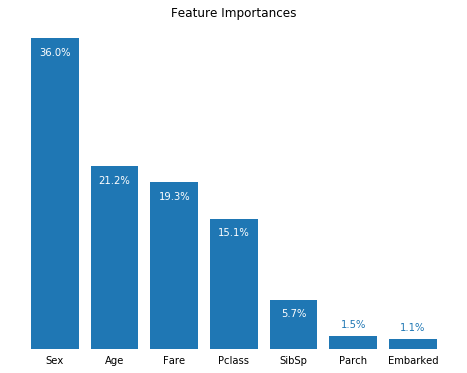

In [119]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

features = [x[0] for x in sorted_importances]
importances = [x[1] for x in sorted_importances]

x_pos = np.arange(len(sorted_importances))
plt.bar(x_pos, importances)


plt.yticks([])
plt.xticks(x_pos, features)
plt.tick_params(bottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)
    
add_percent_labels(ax)

plt.title('Feature Importances')

plt.show()

### A Little Further

In [87]:
male = df[df.Sex == 1]
female = df[df.Sex == 0]

feature_cols.remove('Sex')

X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(male[feature_cols], male.Survived, random_state=0)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(female[feature_cols], female.Survived, random_state=0)

male_forest = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, random_state=0)
male_forest.fit(X_train_male, y_train_male)
female_forest = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, random_state=0)
female_forest.fit(X_train_female, y_train_female)

print('Male')
print('Accuracy on training set:',male_forest.score(X_train_male, y_train_male))
print('Accuracy on test set:',male_forest.score(X_test_male, y_test_male))
print('Area under the ROC curve score on test set:',roc_auc_score(y_test_male, male_forest.predict_proba(X_test_male)[:, 1]))
print('\nFemale')
print('Accuracy on training set:',female_forest.score(X_train_female, y_train_female))
print('Accuracy on test set:',female_forest.score(X_test_female, y_test_female))
print('Area under the ROC curve score on test set:',roc_auc_score(y_test_female, female_forest.predict_proba(X_test_female)[:, 1]))

Male
Accuracy on training set: 0.976401179941003
Accuracy on test set: 0.8157894736842105
Area under the ROC curve score on test set: 0.6536824180502341

Female
Accuracy on training set: 0.9948453608247423
Accuracy on test set: 0.8153846153846154
Area under the ROC curve score on test set: 0.876


In [90]:
# sort using original sorting (above)
sorted_features = features

male_feature_importances = dict(zip(feature_cols, men_forest.feature_importances_))
sorted_male_importances = sorted(list(male_feature_importances.items()), key=lambda x: sorted_features.index(x[0]))

female_feature_importances = dict(zip(feature_cols, women_forest.feature_importances_))
sorted_female_importances = sorted(list(female_feature_importances.items()), key=lambda x: sorted_features.index(x[0]))

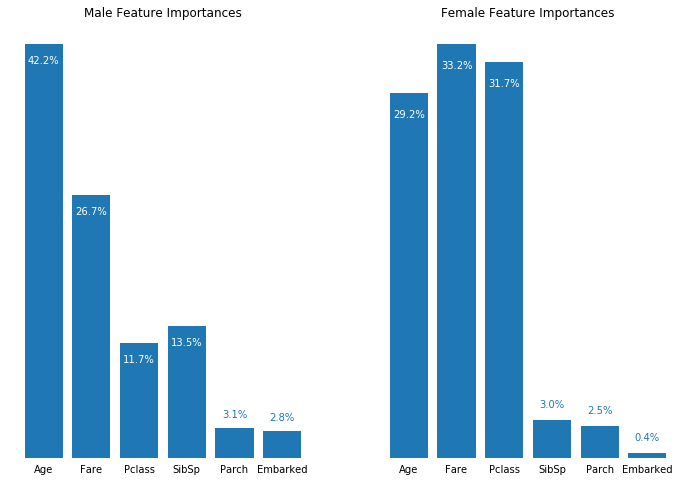

In [120]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(121)

male_features = [x[0] for x in sorted_male_importances]
male_importances = [x[1] for x in sorted_male_importances]

x_pos = np.arange(len(sorted_male_importances))
plt.bar(x_pos, male_importances)

plt.yticks([])
plt.xticks(x_pos, male_features)
plt.tick_params(bottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)

add_percent_labels(ax)
    
plt.title('Male Feature Importances')



ax = fig.add_subplot(122)

female_features = [x[0] for x in sorted_female_importances]
female_importances = [x[1] for x in sorted_female_importances]

x_pos = np.arange(len(sorted_female_importances))
plt.bar(x_pos, female_importances)

plt.yticks([])
plt.xticks(x_pos, female_features)
plt.tick_params(bottom='off')
for spine in ax.spines.values():
    spine.set_visible(False)

add_percent_labels(ax)

plt.title('Female Feature Importances')

plt.show()

plt.show()

Of notice in the above charts:
<ul>
    <li>Age becomes very important with Sex removed</li>
    <li>Age was more important than Fare for men but the reverse was true for women</li>
    <li>Pclass was much more important for women than men</li>
    <li>SibSp was much more important for men than for women</li>
</ul>